In [ ]:
root_dir = '/content/drive/MyDrive/DL_Project/Nhi_Notebook'
!cd $root_dir

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
print(root_dir)

lib_dir = os.path.join(root_dir, 'lib')
project_dir = os.path.join(root_dir, 'workspace', 'traffic_sign')

!mkdir $lib_dir -p
!mkdir $project_dir -p

/content/drive/MyDrive/DL_Project/Nhi_Notebook


In [ ]:
lib_dir

'/content/drive/MyDrive/DL_Project/Nhi_Notebook/lib'

# 1. Installation
Install Tensorflow Model garden

In [ ]:
cd /content/drive/MyDrive/DL_Project/Nhi_Notebook/lib

/content/drive/.shortcut-targets-by-id/13MGmOkboYlAMsVDogvXr0hajDM3iTzpj/DL_Project/Nhi_Notebook/lib


In [ ]:
ls

model_main_tf2.py  protoc/                         TrafficSignDetection/
models/            protoc-3.14.0-linux-x86_64.zip


##1.1 Install model garden

In [ ]:
# Downloading the TensorFlow Model Garden
!git clone https://github.com/tensorflow/models
!ls models

fatal: destination path 'models' already exists and is not an empty directory.
AUTHORS     CONTRIBUTING.md  official	research
CODEOWNERS  ISSUES.md	     orbit	ssd_mobilenet_v2_320x320_coco17_tpu-8
community   LICENSE	     README.md


## 1.2 Install Protobuf

In [ ]:
# Install protobuf
!wget -nc https://github.com/protocolbuffers/protobuf/releases/download/v3.14.0/protoc-3.14.0-linux-x86_64.zip
!unzip -n protoc-*.zip -d protoc

File ‘protoc-3.14.0-linux-x86_64.zip’ already there; not retrieving.

Archive:  protoc-3.14.0-linux-x86_64.zip


In [ ]:
import os

# Add protoc binary to path (temporarily for this jupyter kernel only)
protoc_path = os.path.abspath('./protoc/bin')
if protoc_path not in os.environ['PATH']:
    os.environ['PATH'] += ':' + protoc_path

# verify
!protoc --version

libprotoc 3.0.0


In [ ]:
# :/
%cd models/research
!protoc object_detection/protos/*.proto --python_out=.
%cd ../..

/content/drive/.shortcut-targets-by-id/13MGmOkboYlAMsVDogvXr0hajDM3iTzpj/DL_Project/Nhi_Notebook/lib/models/research
/content/drive/.shortcut-targets-by-id/13MGmOkboYlAMsVDogvXr0hajDM3iTzpj/DL_Project/Nhi_Notebook/lib


## 1.4 Install Object Detection API

In [ ]:
%cd /content/drive/MyDrive/DL_Project/Nhi_Notebook/lib/models/research
!cp object_detection/packages/tf2/setup.py .
%pip install .
%cd ../..

/content/drive/.shortcut-targets-by-id/13MGmOkboYlAMsVDogvXr0hajDM3iTzpj/DL_Project/Nhi_Notebook/lib/models/research
Processing /content/drive/.shortcut-targets-by-id/13MGmOkboYlAMsVDogvXr0hajDM3iTzpj/DL_Project/Nhi_Notebook/lib/models/research
     |████████████████████████████████| 9.0MB 12.7MB/s 
     |████████████████████████████████| 358kB 58.0MB/s 
     |████████████████████████████████| 1.1MB 48.0MB/s 
     |████████████████████████████████| 153kB 59.6MB/s 
     |████████████████████████████████| 2.0MB 51.0MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 829kB 45.8MB/s 
     |████████████████████████████████| 17.7MB 219kB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 174kB 58.1MB/s 
     |████████████████████████████████| 102kB 15.3MB/s 
     |███████████████████████████

/content/drive/.shortcut-targets-by-id/13MGmOkboYlAMsVDogvXr0hajDM3iTzpj/DL_Project/Nhi_Notebook/lib


In [ ]:
# Test installation
# Warning: use !python3, do not use %run if you don't know exactly what it causes
!python3 models/research/object_detection/builders/model_builder_tf2_test.py

2021-01-16 04:40:22.956149: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2021-01-16 04:40:26.121433: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-16 04:40:26.122421: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-16 04:40:26.126801: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-16 04:40:26.127356: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB devic

# 2. Training custom object detector

In [ ]:
# cd to project directory
%cd $project_dir

/content/drive/.shortcut-targets-by-id/13MGmOkboYlAMsVDogvXr0hajDM3iTzpj/DL_Project/Nhi_Notebook/workspace/traffic_sign


## 2.1 Prepare data

In [ ]:
labelmap_dir = '/content/drive/MyDrive/DL_Project/SangEm_Notebook/workspace/traffic_sign/annotations/label_map.pbtxt'

In [ ]:
train_record = '/content/drive/MyDrive/DL_Project/SangEm_Notebook/workspace/traffic_sign/annotations/train.record'
test_record = '/content/drive/MyDrive/DL_Project/SangEm_Notebook/workspace/traffic_sign/annotations/test.record'

If you want to generate the tfrecord file, please clone
https://github.com/ngonhi/TrafficSignDetection.git and run

`python3 generate_tfrecord.py --images IMAGE_PATH --annot ANNOTATION_PATH --label_map LABELMAP_PATH --save_tfrecords TF_RECORD_PATH`

If you received error `object_detection not found`, please clone https://github.com/tensorflow/models.git 
in `TrafficSignDetection`

## 2.2 Configure a training job

In [ ]:
pwd

'/content/drive/.shortcut-targets-by-id/13MGmOkboYlAMsVDogvXr0hajDM3iTzpj/DL_Project/Nhi_Notebook/workspace/traffic_sign'

In [ ]:
# create pretrained_models folder to contain downloaded models from TF2DMZ
# and models folder to save our own model configuration for training
!mkdir pretrained_models models -p

In [ ]:
pretrained_model_url = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz'

In [ ]:
%cd pretrained_models
model_name = pretrained_model_url.split('/')[-1].split('.')[0]
#!wget -nc $pretrained_model_url
!tar -xf $model_name*.tar.gz --keep-newer-files
%cd ..

/content/drive/.shortcut-targets-by-id/13MGmOkboYlAMsVDogvXr0hajDM3iTzpj/DL_Project/Nhi_Notebook/workspace/traffic_sign/pretrained_models
tar: Current ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001’ is newer or same age
tar: Current ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint’ is newer or same age
tar: Current ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index’ is newer or same age
tar: Current ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config’ is newer or same age
tar: Current ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb’ is newer or same age
tar: Current ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001’ is newer or same age
tar: Current ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index’ is newer or same age
/content/drive/.shortcut-targets-by-id/13MGmOkboYlAMsVDogvXr0hajDM3iTzpj/DL_Project/Nhi_Notebook/workspace

In [ ]:
pretrained_model_dir = os.path.join('pretrained_models', model_name)
model_dir = os.path.join('models', model_name)

pretrained_pipeline_config_path = os.path.join(pretrained_model_dir, 'pipeline.config')
pipeline_config_path = os.path.join(model_dir, 'pipeline.config')

# create a directory in models and copy the sample pipeline.config
if os.path.isdir(pretrained_model_dir) and not os.path.exists(pipeline_config_path):
    !mkdir $model_dir -p
    !cp $pretrained_pipeline_config_path $pipeline_config_path

## 2.3 Training

In [ ]:
cd $project_dir

/content/drive/.shortcut-targets-by-id/13MGmOkboYlAMsVDogvXr0hajDM3iTzpj/DL_Project/Nhi_Notebook/workspace/traffic_sign


In [ ]:
pipeline_config_path

'models/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config'

In [ ]:
cd $project_dir

/content/drive/.shortcut-targets-by-id/13MGmOkboYlAMsVDogvXr0hajDM3iTzpj/DL_Project/Nhi_Notebook/workspace/traffic_sign


In [ ]:
# Start training
#!wget -nc https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/model_main_tf2.py
!python3 model_main_tf2.py --model_dir=$model_dir --pipeline_config_path=$pipeline_config_path  --alsologtostderr #--checkpoint_dir=$model_dir

2021-01-15 14:59:34.509515: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-01-15 14:59:37.372320: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-15 14:59:37.373261: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-15 14:59:37.391157: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-15 14:59:37.391838: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-01-15 14:59:37.391873: I tensorflow/stream_executor/platform/def

In [ ]:
!python3 model_main_tf2.py --model_dir=$model_dir --pipeline_config_path=$pipeline_config_path  --alsologtostderr --checkpoint_dir=$model_dir

2021-01-15 16:55:12.452469: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
W0115 16:55:15.502314 140255948199808 model_lib_v2.py:1026] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0115 16:55:15.502561 140255948199808 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0115 16:55:15.502683 140255948199808 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0115 16:55:15.502782 140255948199808 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0115 16:55:15.502907 140255948199808 model_lib_v2.py:1041] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-01-15 16:55:15.512598: I tensorflow/compiler/jit/xla

In [ ]:
# create exported_models folder to save
exported_model_dir = os.path.join('exported_models', model_name)
!mkdir $exported_model_dir -p
!wget -nc https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/exporter_main_v2.py
!python3 exporter_main_v2.py --input_type image_tensor \
            --pipeline_config_path=$pipeline_config_path \
            --trained_checkpoint_dir=$model_dir \
            --output_directory=$exported_model_dir

File ‘exporter_main_v2.py’ already there; not retrieving.

2021-01-15 16:48:26.113036: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-01-15 16:48:28.686488: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-15 16:48:28.687482: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-15 16:48:28.703163: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-15 16:48:28.703767: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-01-15

# 3. Inference from saved model

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
%matplotlib inline

In [ ]:
def inference(detector, category_index, img_path):
    # uint8 numpy array with shape (img_height, img_width, 3) for RGB
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(img)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    detections = detector(input_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    # visualize output
    output_img = img.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
          output_img,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)
    return output_img

In [ ]:
saved_model_dir = "/content/drive/MyDrive/DL_Project/Nhi_Notebook/workspace/traffic_sign/exported_models/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model"

detector = tf.saved_model.load(saved_model_dir)

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(labelmap_dir, use_display_name=True)

In [ ]:
test_dir = '/content/drive/MyDrive/DL_Project/Data/Test_Set_Public'

(626, 1622, 3)


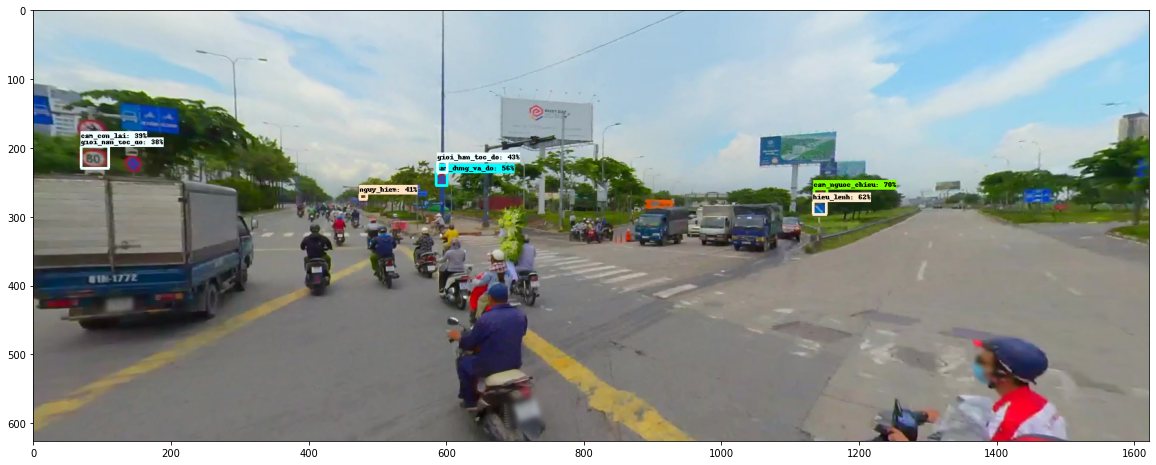

In [ ]:
output_img = inference(detector, category_index, os.path.join(test_dir, '19.png'))

print(output_img.shape)
plt.figure(figsize=(20, 12))
plt.imshow(output_img)
plt.show()

(626, 1622, 3)


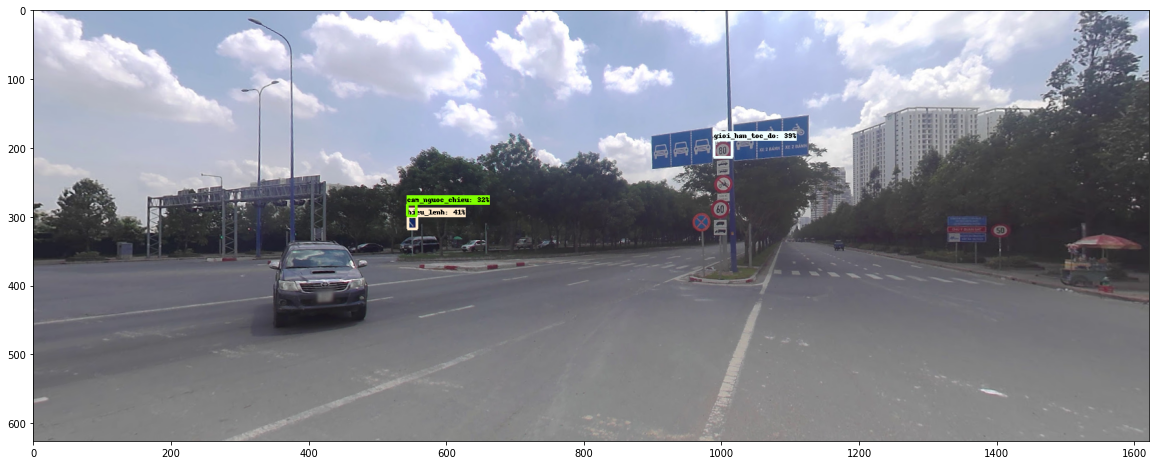

In [ ]:
output_img = inference(detector, category_index, os.path.join(test_dir, '11.png'))

print(output_img.shape)
plt.figure(figsize=(20, 12))
plt.imshow(output_img)
plt.show()

(626, 1622, 3)


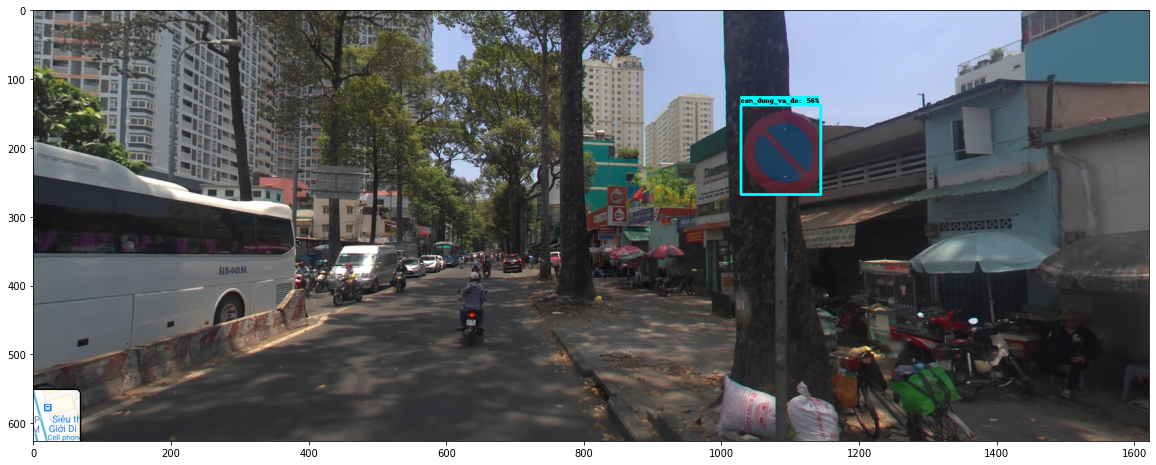

In [ ]:
output_img = inference(detector, category_index, os.path.join('/content/drive/MyDrive/DL_Project/Data_Split/images/valid', '22.png'))

print(output_img.shape)
plt.figure(figsize=(20, 12))
plt.imshow(output_img)
plt.show()